In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
from utils.paths import *

import pandas as pd
import matplotlib.pyplot as plt
import os

In [3]:
def get_scores_dataframe(dataset, dims, prefix=""):
    df = None

    for prueba in pruebas:
        path = os.path.join(scores_path, dataset, prueba, "%s%d.csv" % (prefix, dims))
        
        if os.path.exists(path):
            #print path
            if df is None:
                df = pd.read_csv(path, sep=',', header=0)
            else:
                new_df = pd.read_csv(path, sep=',', header=0)
                df = df.append(new_df, ignore_index=True)
    
    if df is None:
        return pd.DataFrame(columns=dataframe_columns)
                
    #se dejan disponibles solamente la tarea, el tipo de adaptacion y el error
    df_a = df[['Adaptacion', 'Tarea', 'Transfer loss']]
    
    # se manipula el dataframe para dejar la adaptacion como columna 
    df_a = df_a.groupby(['Tarea', 'Adaptacion'], as_index=True ).max()
    df_a = df_a.unstack(level=1)
    df_a.columns = df_a.columns.levels[1]
    
    return df_a

In [4]:
def get_comparison_dataframe(dataset, dims, method):
    df = None

    for prefix in ["me1_", "me2_"]:
        path = os.path.join(scores_path, dataset, method, "%s%d.csv" % (prefix, dims))
        
        if os.path.exists(path):
            if df is None:
                df = pd.read_csv(path, sep=',', header=0)
                
                if prefix == "me1_":
                    df['Adaptacion'] = df['Adaptacion'] + " (ME1)"
                elif prefix is "me2_":
                    df['Adaptacion'] = df['Adaptacion'] + " (ME2)"
                
            else:
                new_df = pd.read_csv(path, sep=',', header=0)
                
                
                if prefix == "me1_":
                    new_df['Adaptacion'] = new_df['Adaptacion'] + " (ME1)"
                elif prefix is "me2_":
                    new_df['Adaptacion'] = new_df['Adaptacion'] + " (ME2)"
                
                df = df.append(new_df, ignore_index=True)
           
    if df is None:
        return pd.DataFrame(columns=dataframe_columns)
                
    #se dejan disponibles solamente la tarea, el tipo de adaptacion y el error
    df_a = df[['Adaptacion', 'Tarea', 'Transfer loss']]
    
    # se manipula el dataframe para dejar la adaptacion como columna 
    df_a = df_a.groupby(['Tarea', 'Adaptacion'], as_index=True ).max()
    df_a = df_a.unstack(level=1)
    df_a.columns = df_a.columns.levels[1]
    
    return df_a

In [5]:
def get_times_dataframe(prefix=""):
    df = None
    
    for prueba in pruebas:
        if prueba is not "baseline":
            file_path = os.path.join(times_path, "%s%s.csv" % (prefix, prueba))
            
            if os.path.exists(file_path):
                if df is None:
                    df = pd.read_csv(file_path, sep=',', header=0)
                else:
                    new_df = pd.read_csv(file_path, sep=',', header=0)
                    df = df.append(new_df, ignore_index=True)
    
    if df is None:
        return pd.DataFrame(columns=dataframe_time_columns)
    
    return df[dataframe_time_columns]

# Dataset Amazon

### El dataset Amazon posee las siguientes características:

| Dominio     | Entrenamiento | Prueba |  % Positivos  | No Etiquetados |
|-------------|---------------|--------|---------------|----------------|
| books       |     1600      | 400    |      50%      |      4465      |
| dvd         |     1600      | 400    |      50%      |      5945      |
| electronics |     1600      | 400    |      50%      |      5681      |
| kitchen     |     1600      | 400    |      50%      |      3586      |


# Gráficos de Tiempo con el dataset Amazon (3000 dimensiones)
# Marco Experimental 1

In [6]:
dims = 3000

In [11]:
df_tiempos = get_times_dataframe("me1_")

In [12]:
df_tiempos = df_tiempos.sort_values('Tiempo').reset_index()[dataframe_time_columns]
df_tiempos.index = df_tiempos['Adaptacion']

In [13]:
df_tiempos

,Adaptacion,Tiempo
Adaptacion,,
PCA (n=750),PCA (n=750),0.360805
GFK (n_dims=10),GFK (n_dims=10),0.655807
GFK (n_dims=20),GFK (n_dims=20),0.660452
GFK (n_dims=50),GFK (n_dims=50),0.664512
PCA (n=1500),PCA (n=1500),0.751653
mSDA (l=1),mSDA (l=1),2.368892
"SDA (l=1, epochs=25)","SDA (l=1, epochs=25)",7.076742
mSDA (l=3),mSDA (l=3),7.107120
mSDA (l=5),mSDA (l=5),11.863423


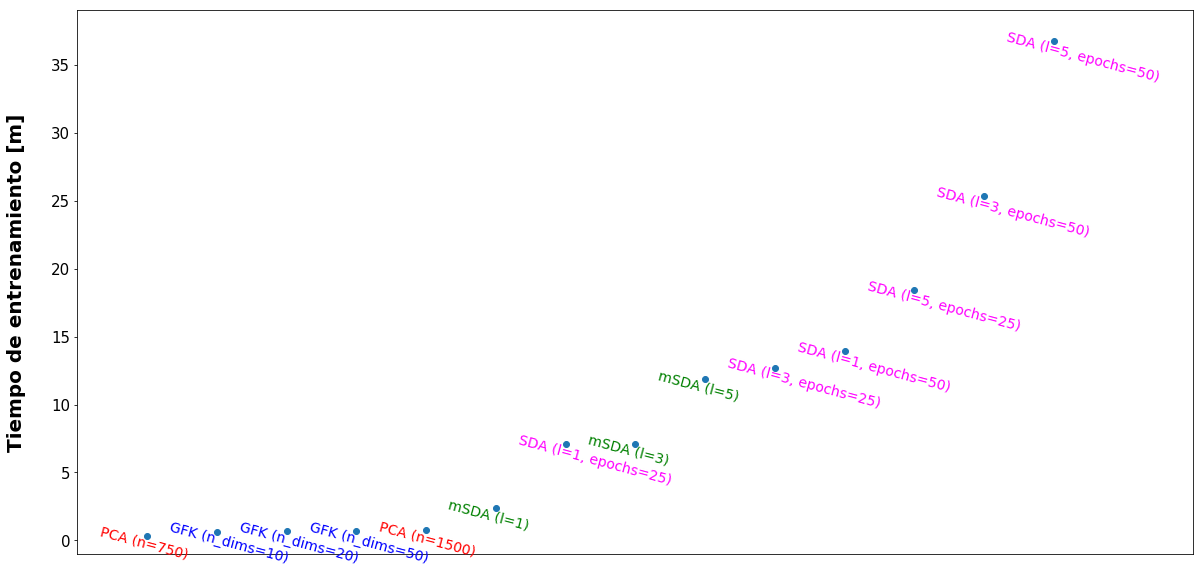

In [14]:
colores = {
    "GFK": 'blue',
    'PCA': 'red',
    'mSDA': 'green',
    'SDA': 'magenta',
}

time_plot = df_tiempos.plot(style='o', figsize=(20,10), rot=65, fontsize=15, legend=False,
                            xlim=(-1, 15), ylim=(-1, 39))
time_plot.set_ylabel("Tiempo de entrenamiento [m]", labelpad=25,fontsize=20, weight='bold')
time_axes = time_plot.axes

xaxis = time_axes.xaxis
xaxis.set_visible(False)


time_fig = time_plot.figure
ax = time_fig.add_subplot(111)

for i in xrange(df_tiempos.shape[0]):
    i
    y = df_tiempos['Tiempo'][i]
    text = df_tiempos['Adaptacion'][i]
    color = colores[text.split(" ")[0]]
    #ax.annotate(text, xy=(i, y), xytext=(i-0.5, y+0.003))
    ax.text(i-0.7, y+0.004, text, fontsize=14, rotation=-15, color=color)
    
figure_path = os.path.join(graficos_path, datasets[0], "me1_tiempos_%d.eps" % dims)
plt.savefig(figure_path, bbox_inches='tight')

#  Marco Experimental 2

In [7]:
df_tiempos = get_times_dataframe("me2_")

In [8]:
df_tiempos = df_tiempos.sort_values('Tiempo').reset_index()[dataframe_time_columns]
df_tiempos.index = df_tiempos['Adaptacion']

In [9]:
df_tiempos

,Adaptacion,Tiempo
Adaptacion,,
PCA (n=750),PCA (n=750),0.033299
PCA (n=1500),PCA (n=1500),0.084175
GFK (n_dims=10),GFK (n_dims=10),0.106289
GFK (n_dims=50),GFK (n_dims=50),0.109967
GFK (n_dims=100),GFK (n_dims=100),0.118441
"SDA (l=1, epochs=25)","SDA (l=1, epochs=25)",0.570283
"SDA (l=3, epochs=25)","SDA (l=3, epochs=25)",0.969827
"SDA (l=1, epochs=50)","SDA (l=1, epochs=50)",1.041546
"SDA (l=5, epochs=25)","SDA (l=5, epochs=25)",1.380471


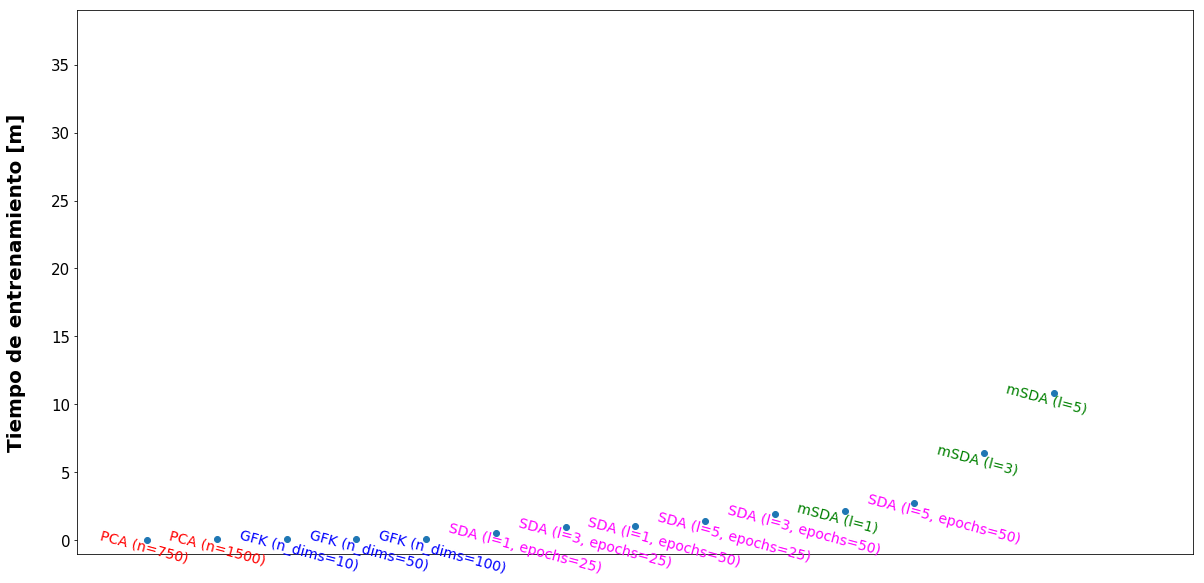

In [10]:
colores = {
    "GFK": 'blue',
    'PCA': 'red',
    'mSDA': 'green',
    'SDA': 'magenta',
}

time_plot = df_tiempos.plot(style='o', figsize=(20,10), rot=65, fontsize=15, legend=False,
                            xlim=(-1, 15), ylim=(-1, 39))
time_plot.set_ylabel("Tiempo de entrenamiento [m]", labelpad=25,fontsize=20, weight='bold')
time_axes = time_plot.axes

xaxis = time_axes.xaxis
xaxis.set_visible(False)


time_fig = time_plot.figure
ax = time_fig.add_subplot(111)

for i in xrange(df_tiempos.shape[0]):
    i
    y = df_tiempos['Tiempo'][i]
    text = df_tiempos['Adaptacion'][i]
    color = colores[text.split(" ")[0]]
    #ax.annotate(text, xy=(i, y), xytext=(i-0.5, y+0.003))
    ax.text(i-0.7, y+0.004, text, fontsize=14, rotation=-15, color=color)
    
figure_path = os.path.join(graficos_path, datasets[0], "me2_tiempos_%d.eps" % dims)
plt.savefig(figure_path, bbox_inches='tight')